In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline

In [5]:
# Reading the bikes file
bikes = pd.read_csv('test_bikes.csv', parse_dates=['datetime'])
bikes.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [6]:
# Reading the trains file
trains = pd.read_csv('train_bikes.csv', parse_dates=['datetime'])
trains.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [7]:
trains.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Manipulating Data 

In [8]:
# Extracting the date from datetime for better analysis and rearranging next to datetime for better readability
# trains = trains.drop('date', axis = 1)
trains.insert(1,'date',trains.datetime.dt.date)
# trains.drop('hour', axis=1, inplace=True)
trains.insert(2,'hour',trains.datetime.dt.hour)

trains.insert(3, 'month', trains.datetime.dt.month )
trains.insert(4, 'year', trains.datetime.dt.year )
trains.tail()

datetime        date  hour  month  year  season  holiday  \
10881 2012-12-19 19:00:00  2012-12-19    19     12  2012       4        0   
10882 2012-12-19 20:00:00  2012-12-19    20     12  2012       4        0   
10883 2012-12-19 21:00:00  2012-12-19    21     12  2012       4        0   
10884 2012-12-19 22:00:00  2012-12-19    22     12  2012       4        0   
10885 2012-12-19 23:00:00  2012-12-19    23     12  2012       4        0   

       workingday  weather   temp   atemp  humidity  windspeed  casual  \
10881           1        1  15.58  19.695        50    26.0027       7   
10882           1        1  14.76  17.425        57    15.0013      10   
10883           1        1  13.94  15.910        61    15.0013       4   
10884           1        1  13.94  17.425        61     6.0032      12   
10885           1        1  13.12  16.665        66     8.9981       4   

       registered  count  
10881         329    336  
10882         231    241  
10883         164    168  
10884         117    129  
10885          84     88

### Visualizing bikes usage in each season

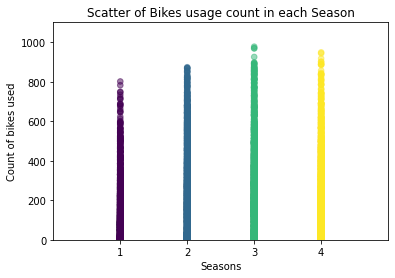

In [9]:
plt.scatter(trains['season'], trains['count'], c=trains['season'], s=32, alpha=0.5)
plt.title('Scatter of Bikes usage count in each Season')
plt.xlabel('Seasons')
plt.ylabel('Count of bikes used')
# plt.xticks(range(trains.groupby('season').ngroups+2))
plt.xticks([1,2,3,4])
plt.xlim(0,5)
plt.ylim(0,1100)
plt.show()

#### Inference
Although there is no significant difference in rental bikes usage in each season it can be seen that there is a general increase in rental bikes usage by the end of a year

### Visualizing bikes usage during holidays

/mnt/01D76E55853AAE90/py-projects/data-science/sales-data/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


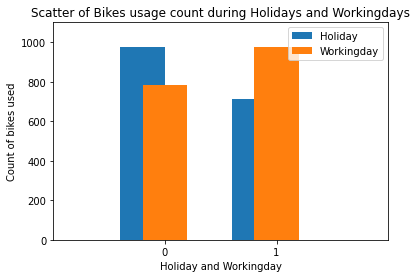

In [18]:
plt.bar(trains['holiday']-0.2, trains['count'], 0.4, label='Holiday')
plt.bar(trains['workingday'], trains['count'], 0.4, label='Workingday')
plt.title('Scatter of Bikes usage count during Holidays and Workingdays')
plt.xlabel('Holiday and Workingday')
plt.ylabel('Count of bikes used')
plt.xticks([0,1])
plt.xlim(-1,2)
plt.ylim(0,1100)
plt.legend()
plt.show()

#### Inference
It is clearly evident that the total rental bike usage increases in a non-holiday i.e a working day, indicating most of the rental bike users are using it to commute to work

### Visualizing bikes usage during different weather patterns

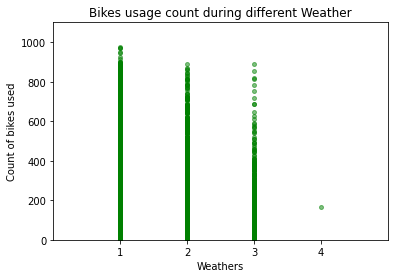

In [9]:
plt.scatter(trains['weather'], trains['count'], c='green', s=16, alpha=0.5)
plt.title('Bikes usage count during different Weather')
plt.xlabel('Weathers')
plt.ylabel('Count of bikes used')
plt.xticks([1,2,3,4])
plt.xlim(0,5)
plt.ylim(0,1100)
plt.show()

### Visualizing bikes usage in different temperature, humidity and windspeed

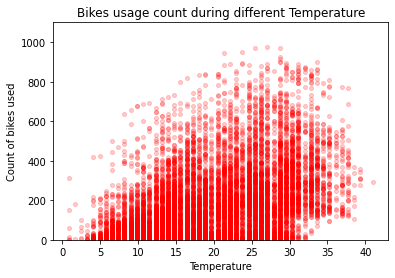

In [10]:
plt.scatter(trains['temp'], trains['count'], c='red', s=16, alpha=0.2)
plt.title('Bikes usage count during different Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count of bikes used')
plt.ylim(0,1100)
plt.show()

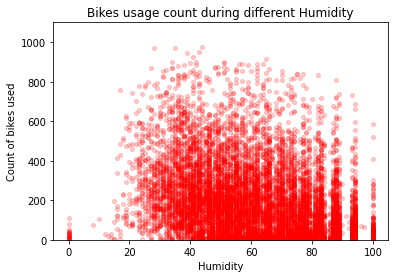

In [11]:
plt.scatter(trains['humidity'], trains['count'], c='red', s=16, alpha=0.2)
plt.title('Bikes usage count during different Humidity')
plt.xlabel('Humidity')
plt.ylabel('Count of bikes used')
plt.ylim(0,1100)
plt.show()

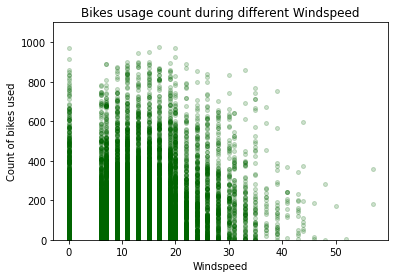

In [12]:
plt.scatter(trains['windspeed'], trains['count'], c='darkgreen', s=16, alpha=0.2)
plt.title('Bikes usage count during different Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Count of bikes used')
plt.ylim(0,1100)
plt.show()

### Visualizing bikes usage by casual and registered users

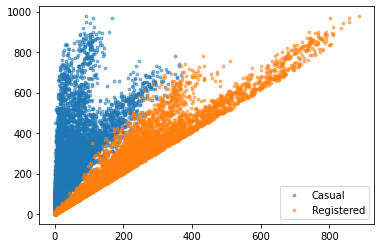

In [13]:
plt.scatter(trains['casual'], trains['count'], label='Casual', alpha=0.5, s=8)
plt.scatter(trains['registered'], trains['count'], label='Registered', alpha=0.5, s=8)
plt.legend()
plt.show()

In [14]:
d = trains.groupby('date', group_keys=True)[['casual', 'registered', 'count']].sum()
d

casual  registered  count
date                                 
2011-01-01     331         654    985
2011-01-02     131         670    801
2011-01-03     120        1229   1349
2011-01-04     108        1454   1562
2011-01-05      82        1518   1600
...            ...         ...    ...
2012-12-15     767        4280   5047
2012-12-16     538        3248   3786
2012-12-17     212        4373   4585
2012-12-18     433        5124   5557
2012-12-19     333        4934   5267

[456 rows x 3 columns]

### Visualizing bikes usage by Casual and Registered users in each season

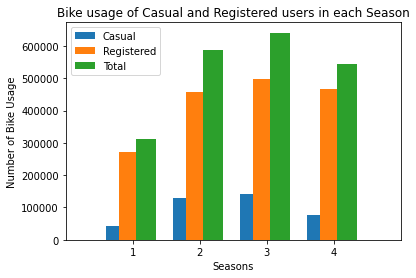

 season  casual  registered  count
      1   41605      270893 312498
      2  129672      458610 588282
      3  142718      497944 640662
      4   78140      465894 544034


In [15]:
s_casual = trains.groupby('season', as_index=False)['casual'].sum()
s_registered = trains.groupby('season', as_index=False)['registered'].sum()
s_total = trains.groupby('season', as_index=False)['count'].sum()

#if as_index=False not given
# plt.bar(s_casual.index-0.2, s_casual, 0.4, label='Casual')
# plt.bar(s_registered.index, s_registered, 0.4, label='Registered')
# plt.bar(s_total.index+0.2, s_total, 0.3, label='Total')

#if as_index=False given
plt.bar(s_casual['season']-0.2, s_casual['casual'], 0.4, label='Casual')
plt.bar(s_registered['season'], s_registered['registered'], 0.4, label='Registered')
plt.bar(s_total['season']+0.2, s_total['count'], 0.3, label='Total')

plt.xlim(0,5)
plt.xticks(s_casual['season'])
plt.title('Bike usage of Casual and Registered users in each Season')
plt.xlabel('Seasons')
plt.ylabel('Number of Bike Usage')
plt.legend()
plt.show()

seasons_data_chart = pd.concat([s_casual, s_registered, s_total], axis=1)
# To remove the duplicate seasons column from the concatinated dataframe
seasons_data_chart = seasons_data_chart.T.drop_duplicates().T
# seasons_data_chart = seasons_data_chart.set_index('season')
print(seasons_data_chart.to_string(index=False))

### Visualizing hourly bikes usage by Casual and Registered users in each year

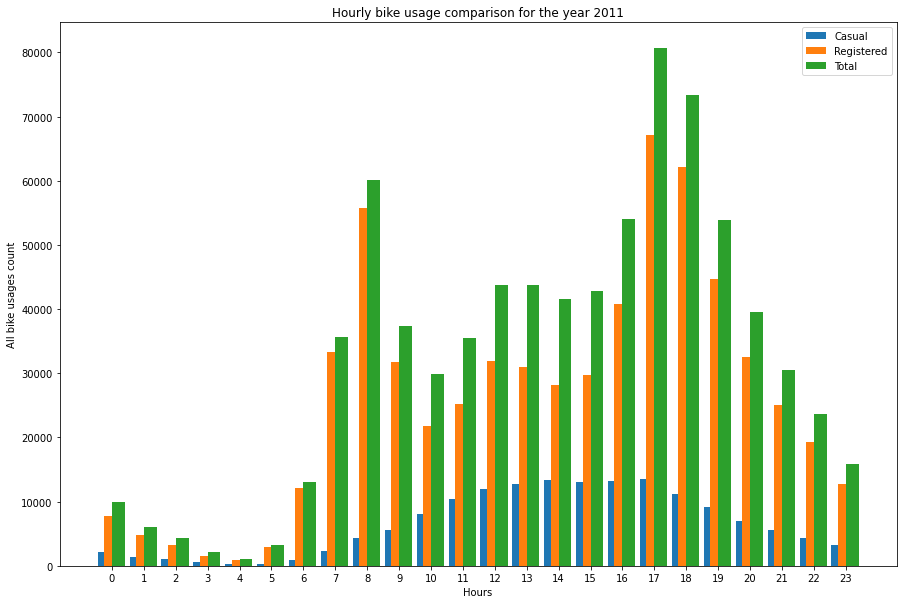

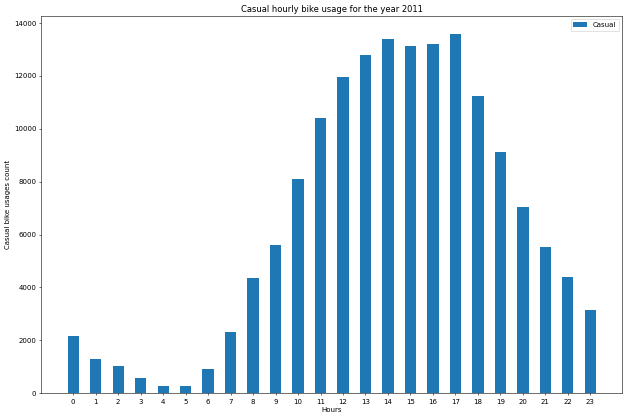

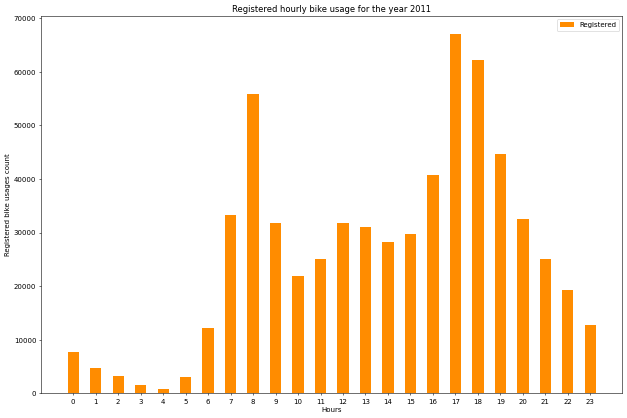

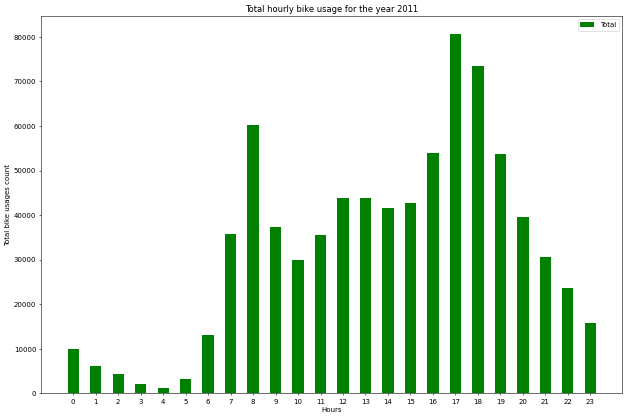

In [28]:
def plot_yearly_by_hour(data, year=None, calc='sum'):
    d = data[data['datetime'].dt.year == year]
    
    if year == None:
        print('Please provide a valid year')
        return

    try:
        year = int(year)
    except:
        print('Please provide a valid year. Only Integers are allowed for years')
        return
    
    h_casual = d.groupby('hour', as_index=False)['casual'].agg(calc)
    h_registered = d.groupby('hour', as_index=False)['registered'].agg(calc)
    h_count = d.groupby('hour', as_index=False)['count'].agg(calc)
    
    plt.figure(figsize=(15,10))
    plt.bar(h_casual['hour']-0.2, h_casual['casual'], 0.5, label='Casual')
    plt.bar(h_registered['hour'], h_registered['registered'], 0.5, label='Registered')
    plt.bar(h_count['hour']+0.2, h_count['count'], 0.4, label='Total')
    plt.xticks(h_casual['hour'])
    plt.xlabel('Hours')
    plt.ylabel('All bike usages count')
    plt.title(f'Hourly bike usage comparison for the year {year}')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(15,10), dpi=50)
    plt.bar(h_casual['hour'], h_casual['casual'], 0.5, label='Casual')
    plt.xticks(h_casual['hour'])
    plt.xlabel('Hours')
    plt.ylabel('Casual bike usages count')
    plt.title(f'Casual hourly bike usage for the year {year}')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(15,10), dpi=50)
    plt.bar(h_registered['hour'], h_registered['registered'], 0.5, label='Registered', color=["darkorange"])
    plt.xticks(h_registered['hour'])
    plt.xlabel('Hours')
    plt.ylabel('Registered bike usages count')
    plt.title(f'Registered hourly bike usage for the year {year}')
    plt.legend()
    plt.show()
        
    plt.figure(figsize=(15,10), dpi=50)
    plt.bar(h_count['hour'], h_count['count'], 0.5, label='Total', color=['green'])
    plt.xticks(h_count['hour'])
    plt.xlabel('Hours')
    plt.ylabel('Total bike usages count')
    plt.title(f'Total hourly bike usage for the year {year}')
    plt.legend()
    plt.show()
    return

plot_yearly_by_hour(trains, 2011)


In [22]:
trains.head()

datetime        date  hour  month  year  season  holiday  \
0 2011-01-01 00:00:00  2011-01-01     0      1  2011       1        0   
1 2011-01-01 01:00:00  2011-01-01     1      1  2011       1        0   
2 2011-01-01 02:00:00  2011-01-01     2      1  2011       1        0   
3 2011-01-01 03:00:00  2011-01-01     3      1  2011       1        0   
4 2011-01-01 04:00:00  2011-01-01     4      1  2011       1        0   

   workingday  weather  temp   atemp  humidity  windspeed  casual  registered  \
0           0        1  9.84  14.395        81        0.0       3          13   
1           0        1  9.02  13.635        80        0.0       8          32   
2           0        1  9.02  13.635        80        0.0       5          27   
3           0        1  9.84  14.395        75        0.0       3          10   
4           0        1  9.84  14.395        75        0.0       0           1   

   count  
0     16  
1     40  
2     32  
3     13  
4      1

### Visualizing Hourly and Monthly bikes usage by Casual and Registered users

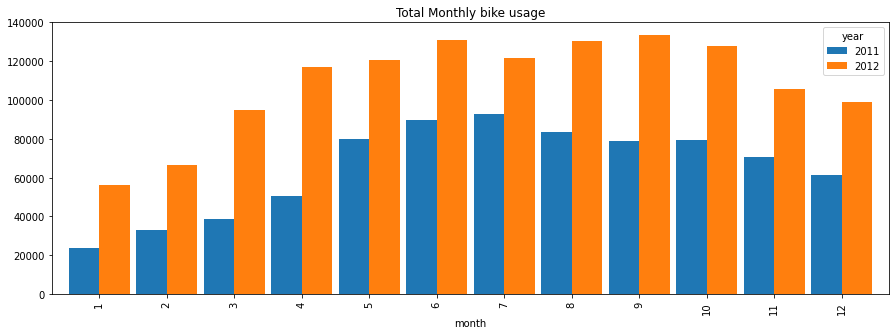

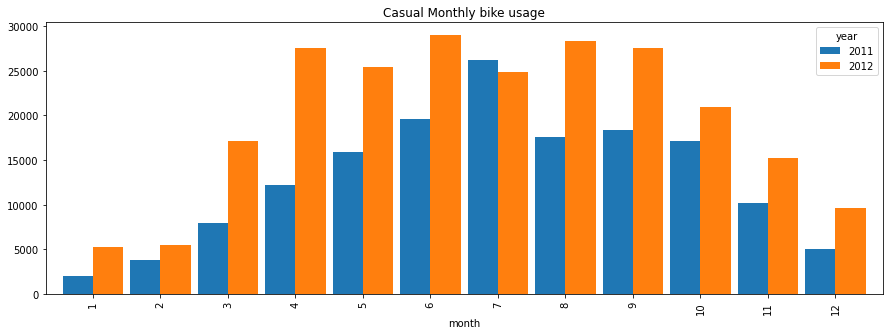

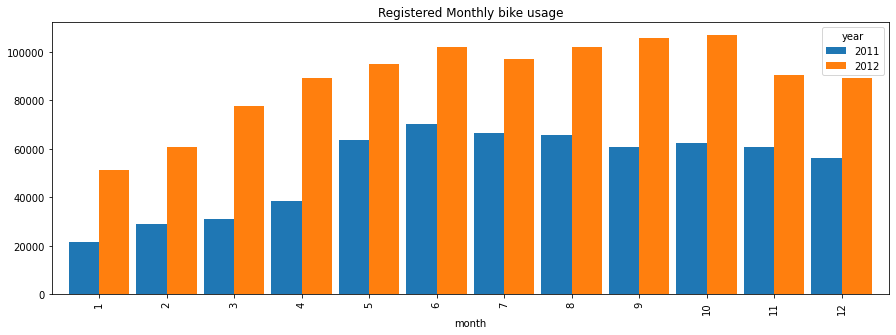

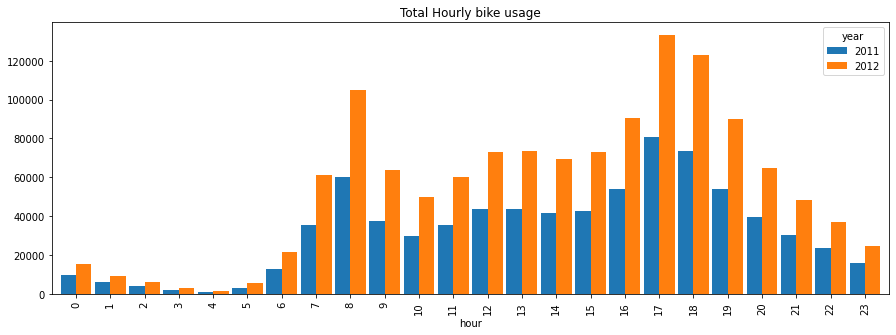

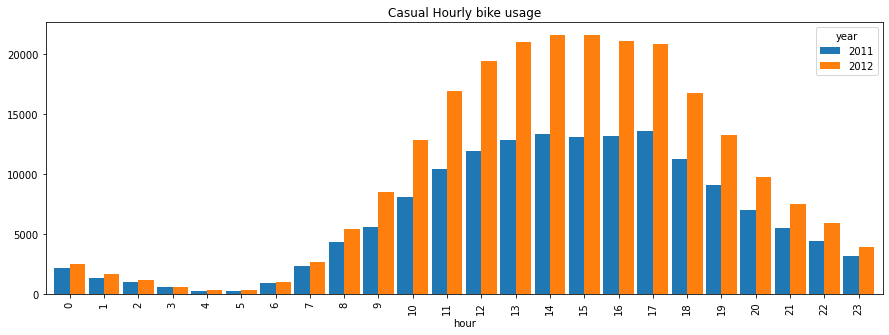

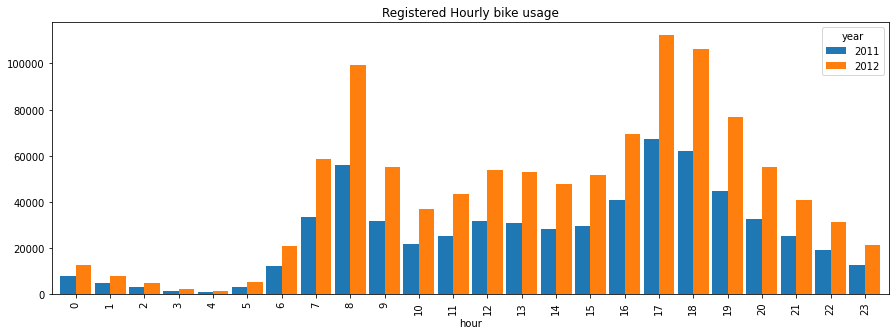

In [96]:
def yearly_comparison_by_datefilter(data, filterType='month', title='', calc='sum'):
    
#unstack() helps to rearrange the multi-index data to a single column data so that the graph can 
#be drawn in adjacent bar instead of a bar graph of one bar on top of other in the case of a stack() data
    
    d = data.copy()

    h_casual = d.groupby([filterType, 'year'])['casual'].agg(calc).unstack()
    h_registered = d.groupby([filterType, 'year'])['registered'].agg(calc).unstack()
    h_count = d.groupby([filterType, 'year'])['count'].agg(calc).unstack()
    
    h_count.plot(kind='bar', figsize=(15,5), width=0.9, title=f'Total {title}')
    h_casual.plot(kind='bar', figsize=(15,5), width=0.9, title=f'Casual {title}')
    h_registered.plot(kind='bar', figsize=(15,5), width=0.9, title=f'Registered {title}')
    
    return

yearly_comparison_by_datefilter(trains, 'month', 'Monthly bike usage')
yearly_comparison_by_datefilter(trains, 'hour', 'Hourly bike usage')


### Visualizing Hourly bikes usage by Casual and Registered users in a year

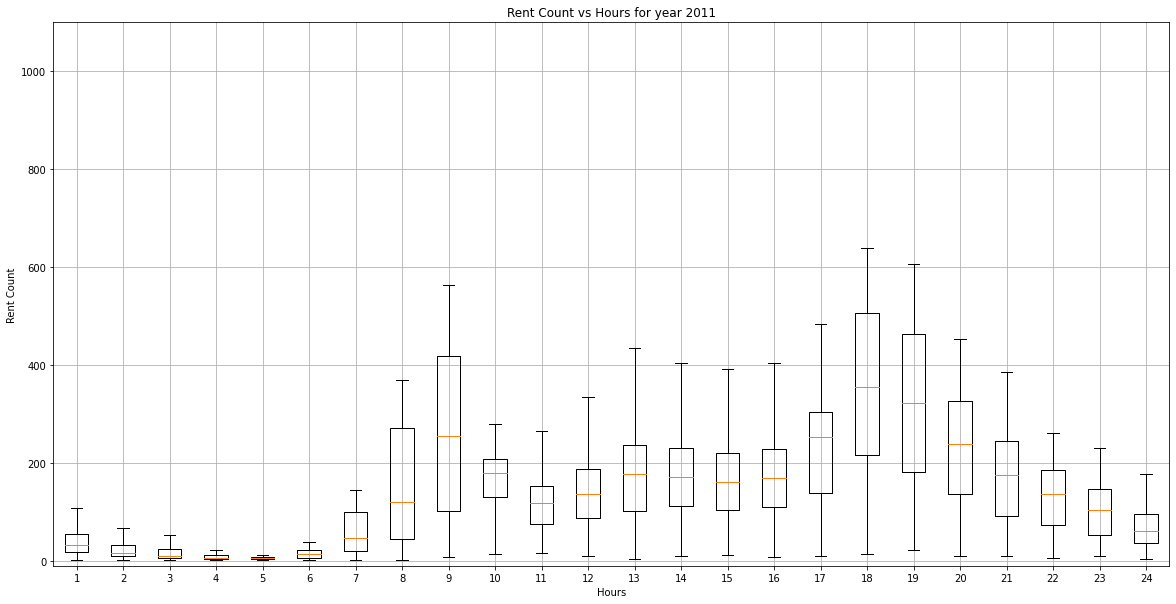

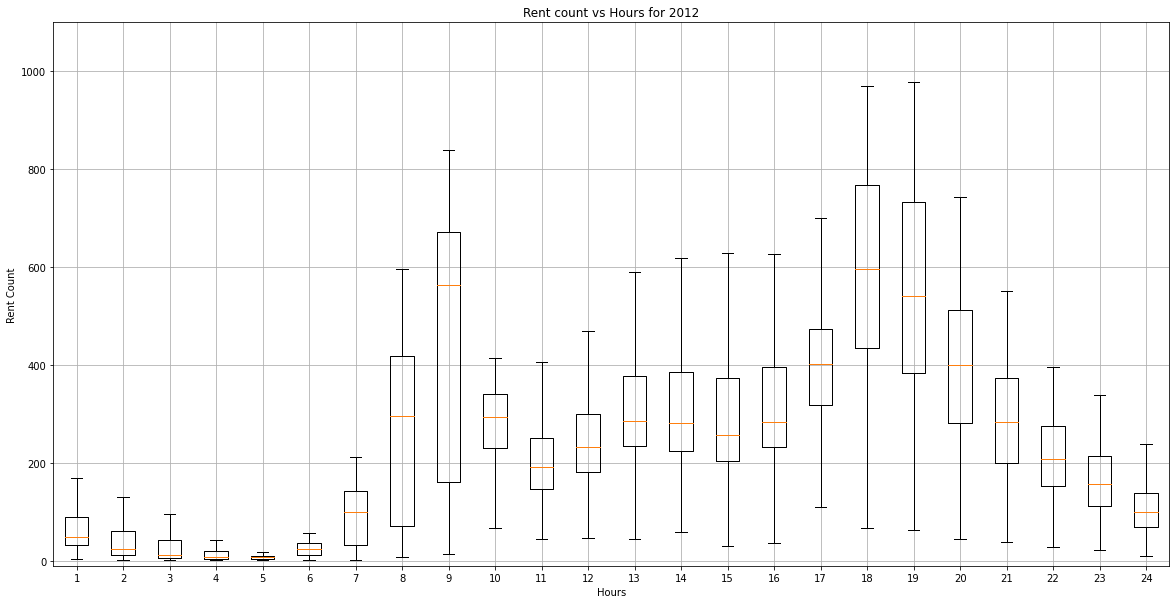

In [92]:
def hourly_count(data, title='', ylabel='Rent Count', xlabel='Hours', size=(20,10)):
    
    d = data.copy()
    
    hours = {}
    for hour in range(24):
        hours[hour] = d[d.hour == hour]['count'].values
    
    plt.figure(figsize=size)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
# Gridlines for better readability
    plt.grid()
# Outlier values can be viewed by giving a symbol to the flierprops marker
    plt.boxplot([hours[hour] for hour in range(24)], 
                notch=False,
                flierprops={'marker': '', 'markersize': 10, 'markerfacecolor': 'fuchsia'})
    
    axis = plt.gca()
    axis.set_ylim([-10,1100])
    
    
hourly_count(trains[trains.year == 2011], 'Rent Count vs Hours for year 2011')
hourly_count(trains[trains.year == 2012], 'Rent count vs Hours for 2012', size=(20,10))

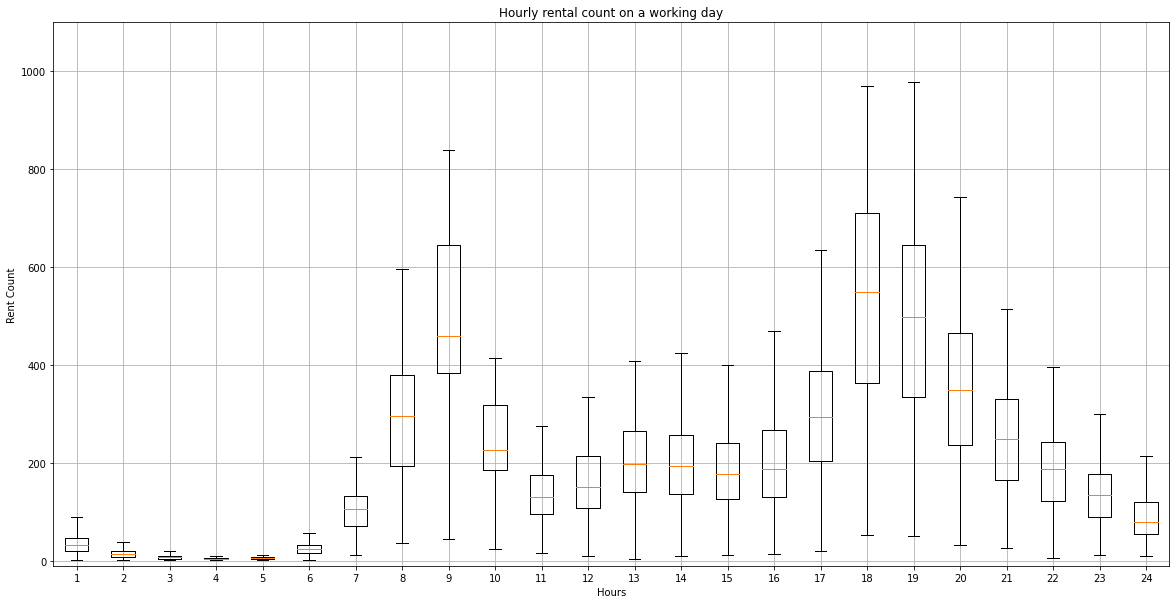

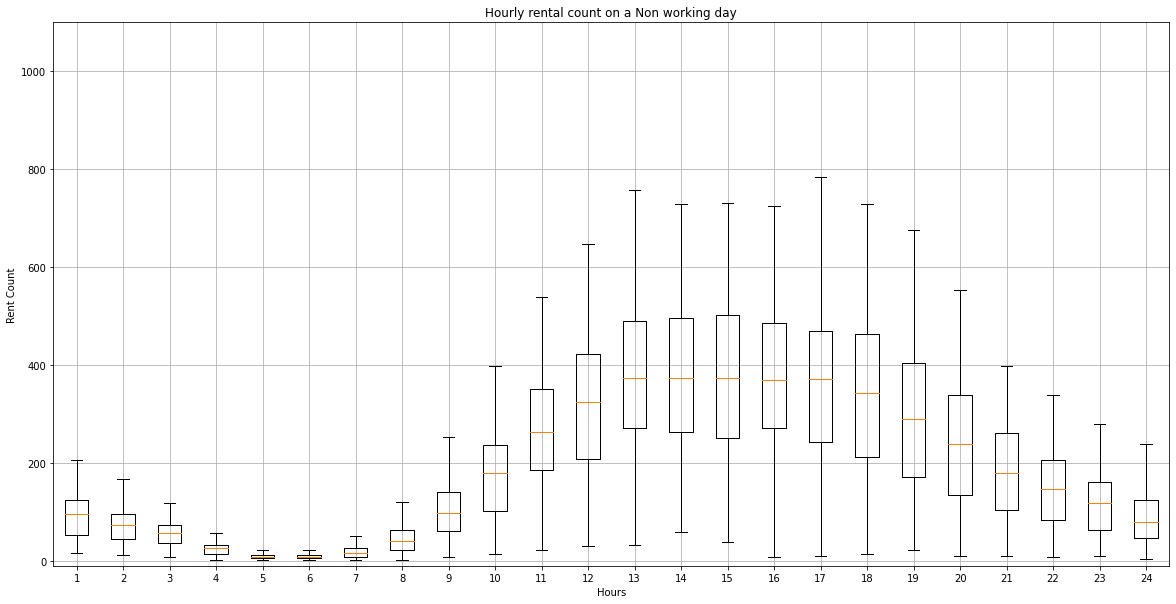

In [93]:
hourly_count(trains[trains.workingday == 1], 'Hourly rental count on a working day')
hourly_count(trains[trains.workingday == 0], 'Hourly rental count on a Non working day')

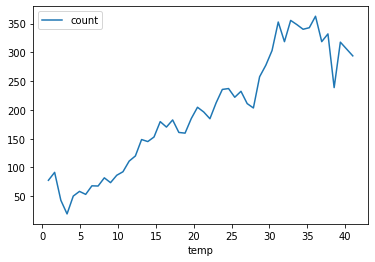

In [98]:
temp = trains.groupby('temp')[['count']].mean()
temp.plot()
plt.show()